# MATH&ML-11. Кластеризация и техники понижения размерности. Часть II

##  1. Введение

✍ В предыдущем модуле мы изучили ряд методов кластеризации и научились применять их для решения практических задач. Однако мы пока не ответили на два вопроса.

Во-первых, мы не разобрались с тем, как оценивать качество.

К сожалению, оценить качество кластеризации сложно, поскольку, в отличие от регрессии или классификации, при кластеризации у нас не всегда есть эталонные ответы, с которыми можно сравнить результаты предсказаний.

Выделяют две больших группы методов, с помощью которых можно оценить результат кластеризации:

**Внутренние меры** — это метрики, которые оценивают качество кластеризации только по той информации, которая есть в неразмеченных данных.

**Внешние меры** — это метрики, которые используют, если в данных есть информация о некотором заранее известном разделении на кластеры, с которым можно сравнить полученный результат.

Разумеется, мы разберём обе группы методов и рассмотрим практически все существующие на данный момент меры, которые можно использовать для оценки качества кластеризации.

Во-вторых, мы упомянули, что из-за большого количества признаков разбиение на кластеры может получиться некачественным и необходимо уменьшать размерность данных, однако не обсудили подходящие для этого алгоритмы.

В этом модуле мы подробно разберём процесс снижения размерности, а также на примере практической задачи увидим, как снижение размерности увеличивает качество кластеризации.

Но прежде чем перейти к изучению материала, давайте повторим то, что вы узнали ранее, так как в этом модуле мы будем активно использовать эти знания. Если какие-то задания вызовут у вас затруднения, рекомендуем ещё раз просмотреть соответствующие юниты предыдущего модуля.

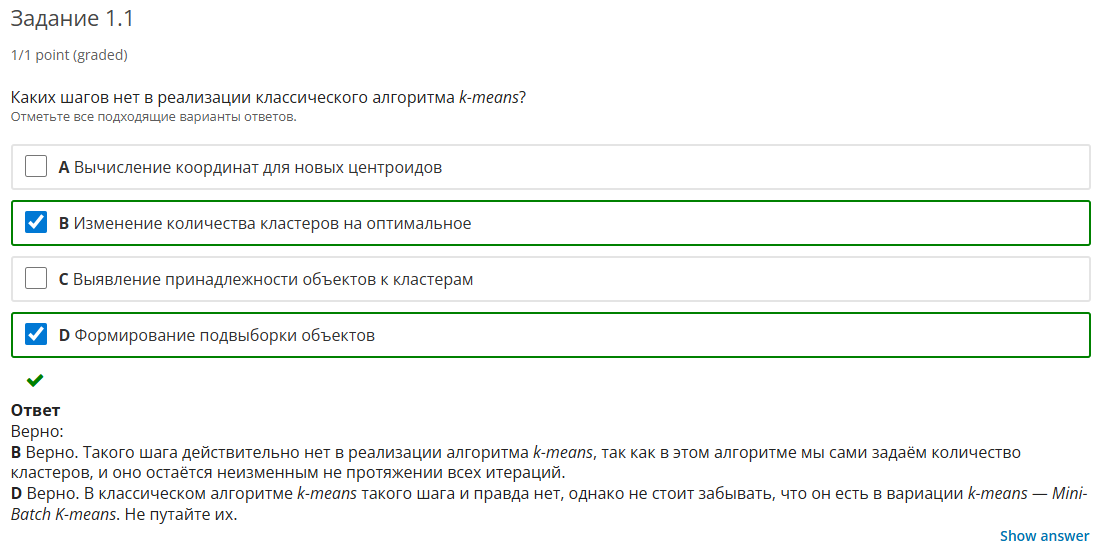

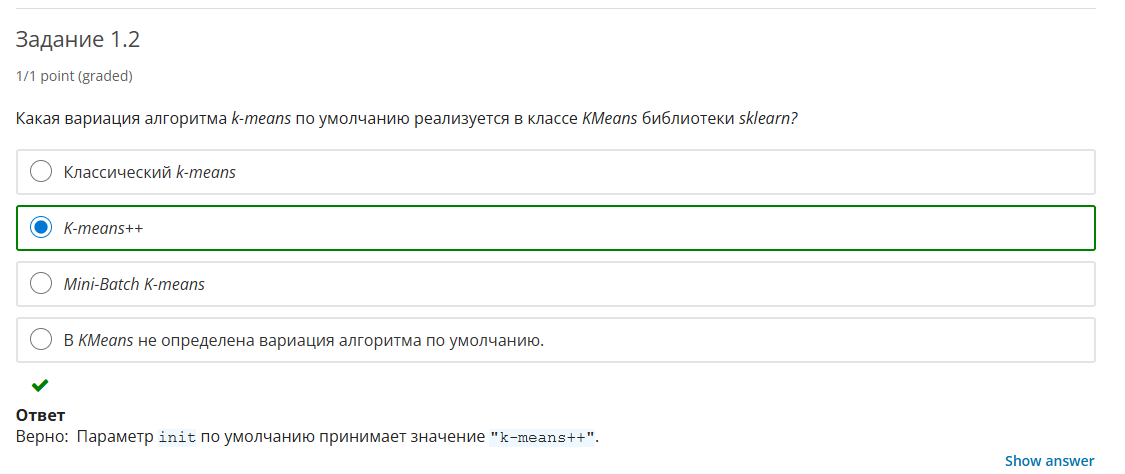

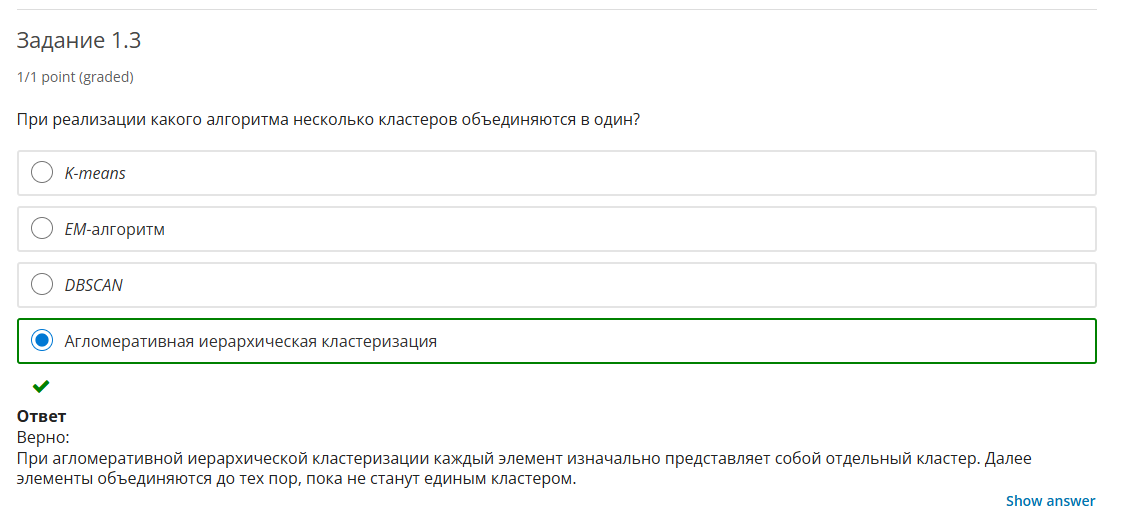

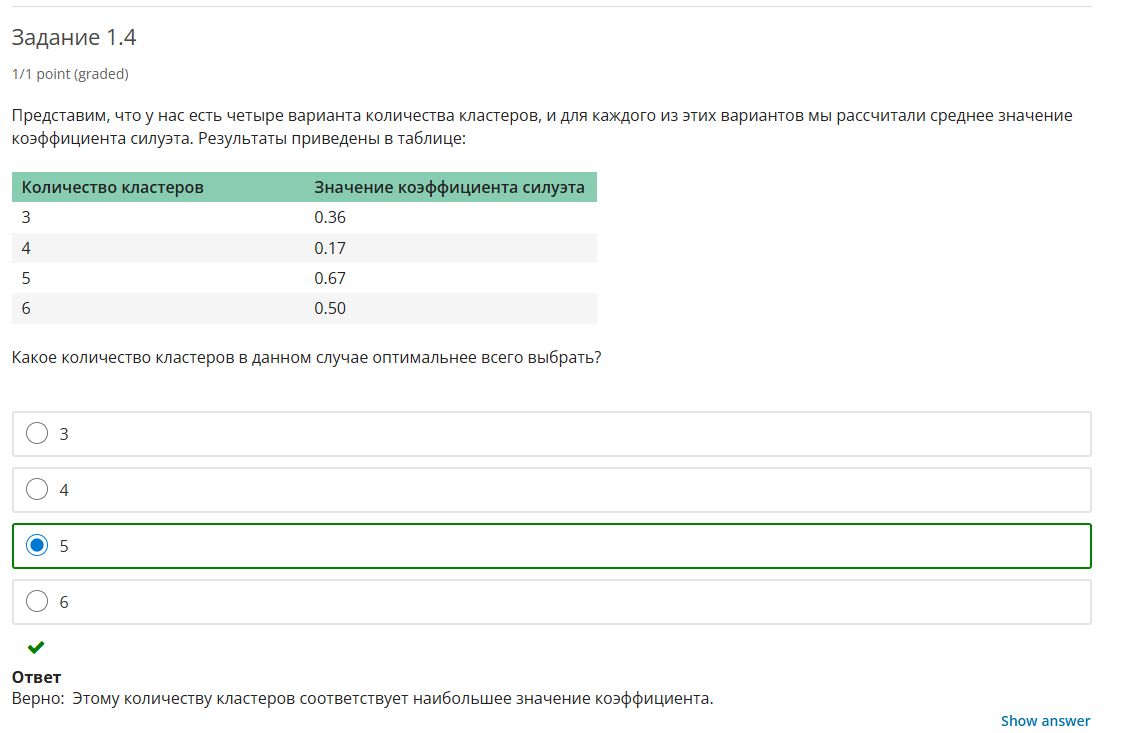

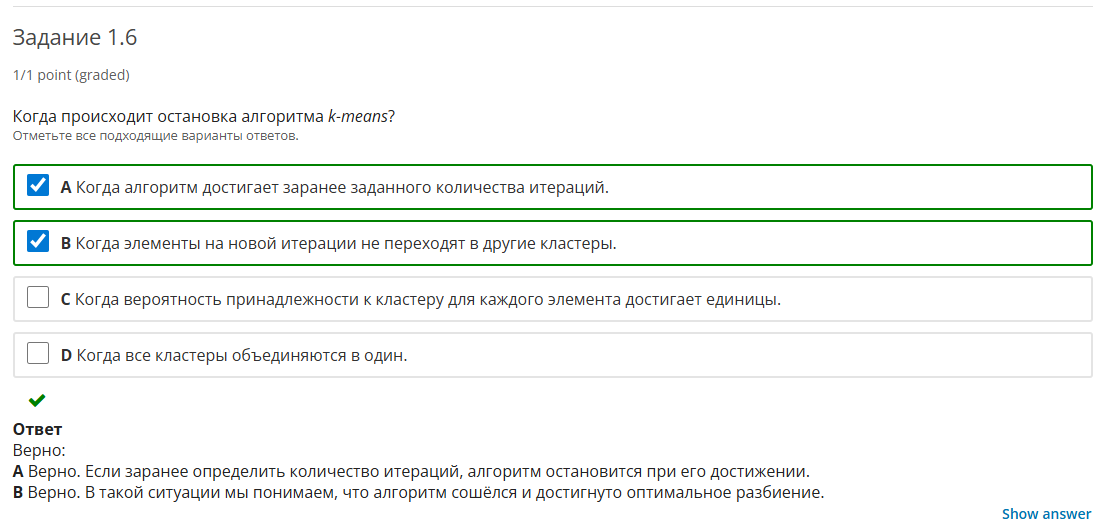

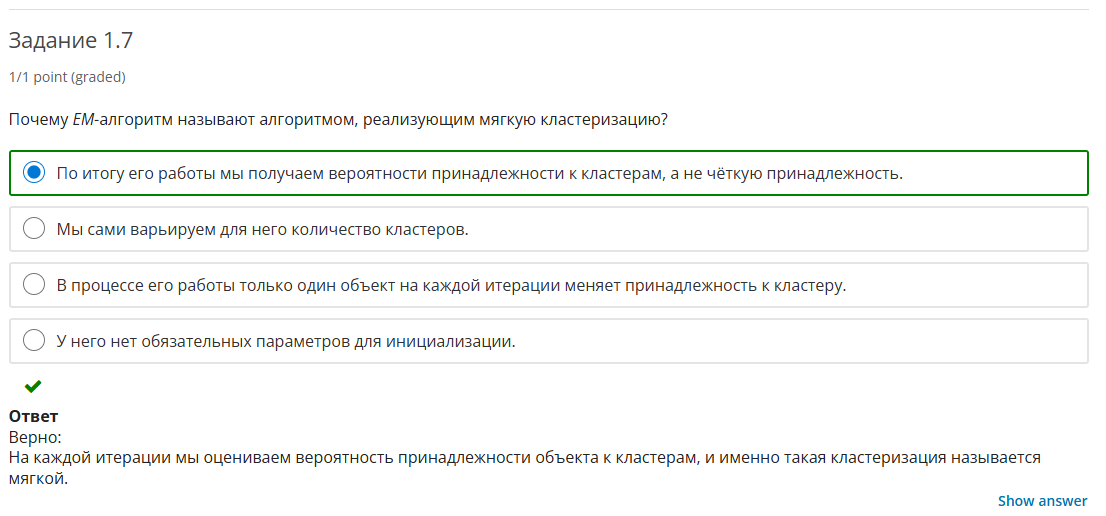

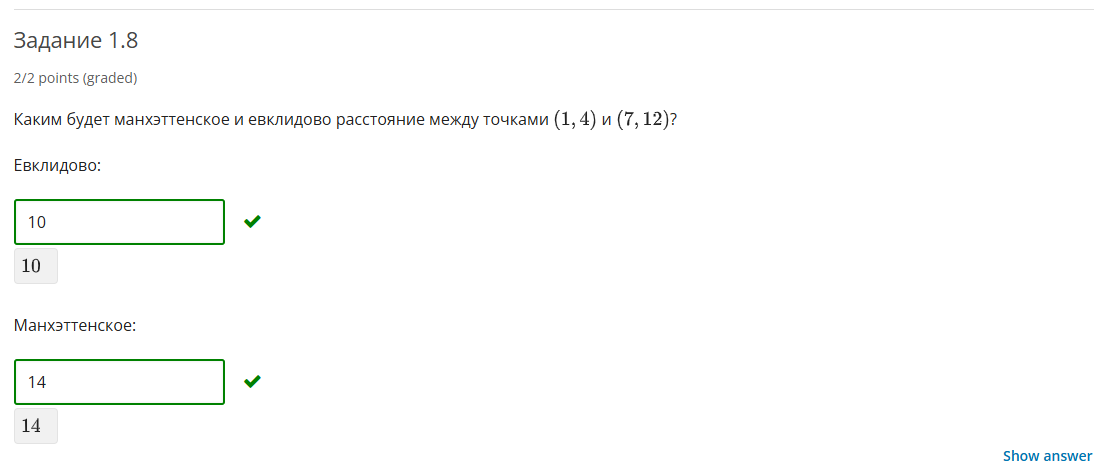

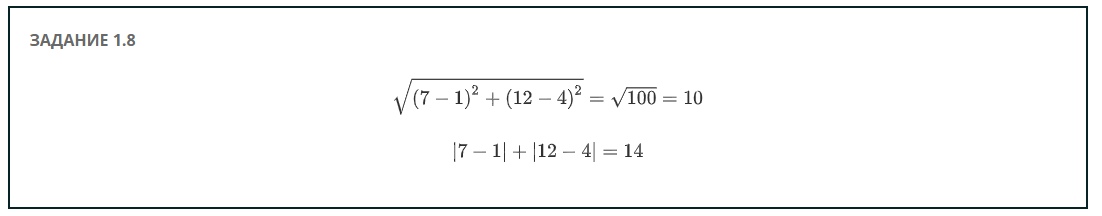

⭐ Отлично! Вы справились со всеми заданиями, а значит, можно переходить к изучению новой темы.

В рамках данного модуля перед нами будут стоять следующие цели:

- Изучить метрики, с помощью которых можно оценить качество кластеризации: мы рассмотрим все внешние и внутренние меры, а также на примере практической задачи научимся вычислять их вручную и с помощью библиотеки sklearn.
- Познакомиться с методами снижения размерности: мы узнаем, зачем необходимо уменьшать размерность, изучим алгоритмы, с помощью которых это можно делать, и, конечно, отработаем полученные навыки на практике.

# 2. Оценка качества кластеризации: внутренние меры

В библиотеке sklearn реализованы три наиболее популярные метрики:

- коэффициент силуэта (Silhouette Coefficient);
- индекс Калински — Харабаса (Calinski-Harabasz Index);
- индекс Дэвиса — Болдина (Davies-Bouldin Index).

Эти метрики мы рассмотрим максимально подробно, а также вычислим каждую из них «вручную». Важно отметить, что вам не потребуется в будущем реализовывать подобные вычисления самостоятельно, однако разбор вычислительных примеров поможет лучше разобраться в том, как рассчитываются значения и каков их смысл.

### Коэффициент силуэта

Некоторые внутренние меры вам уже знакомы по предыдущему модулю, например **коэффициент силуэта**. Мы не зря акцентируем на нём внимание — именно он используется чаще всего и именно о нём вас с наибольшей вероятностью могут спросить на собеседовании. Обсудим коэффициент силуэта немного подробнее.

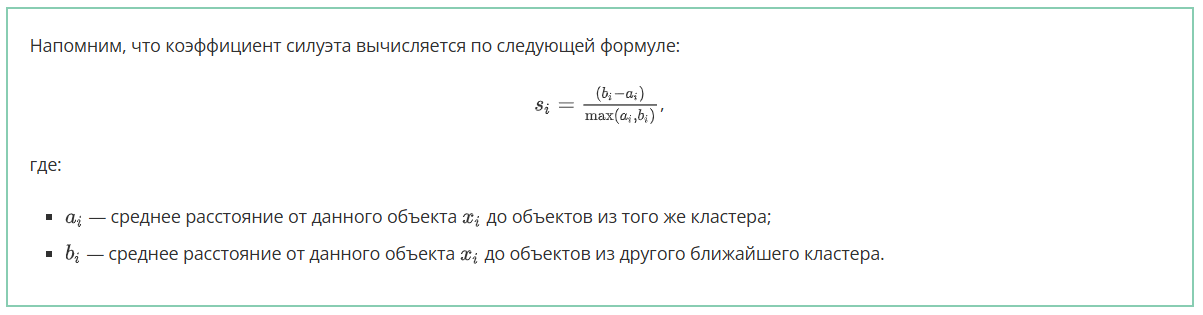

Давайте рассмотрим вычисление коэффициента силуэта на примере.

Допустим, у нас есть семь объектов, разделённых на три кластера.

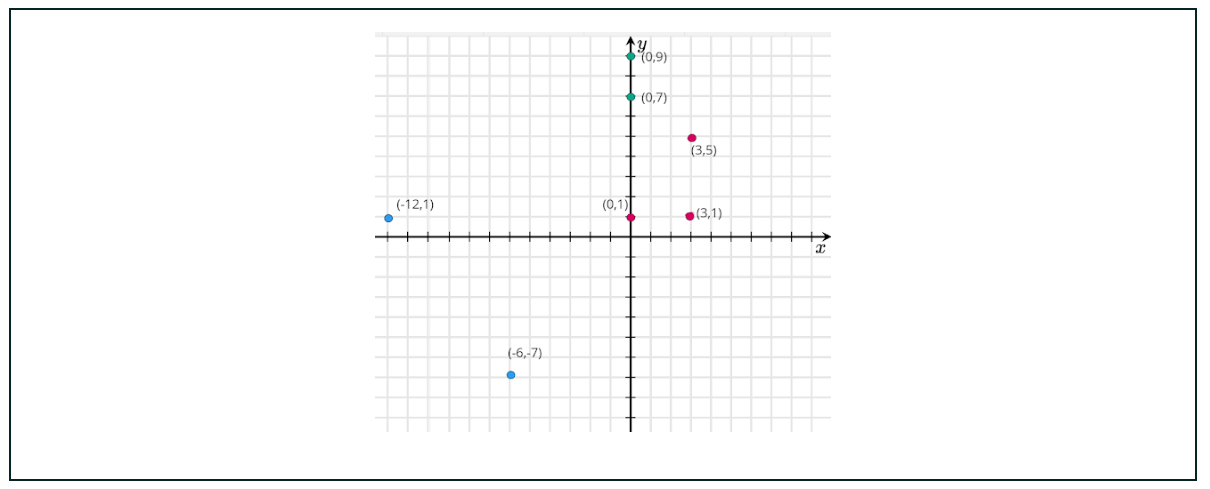

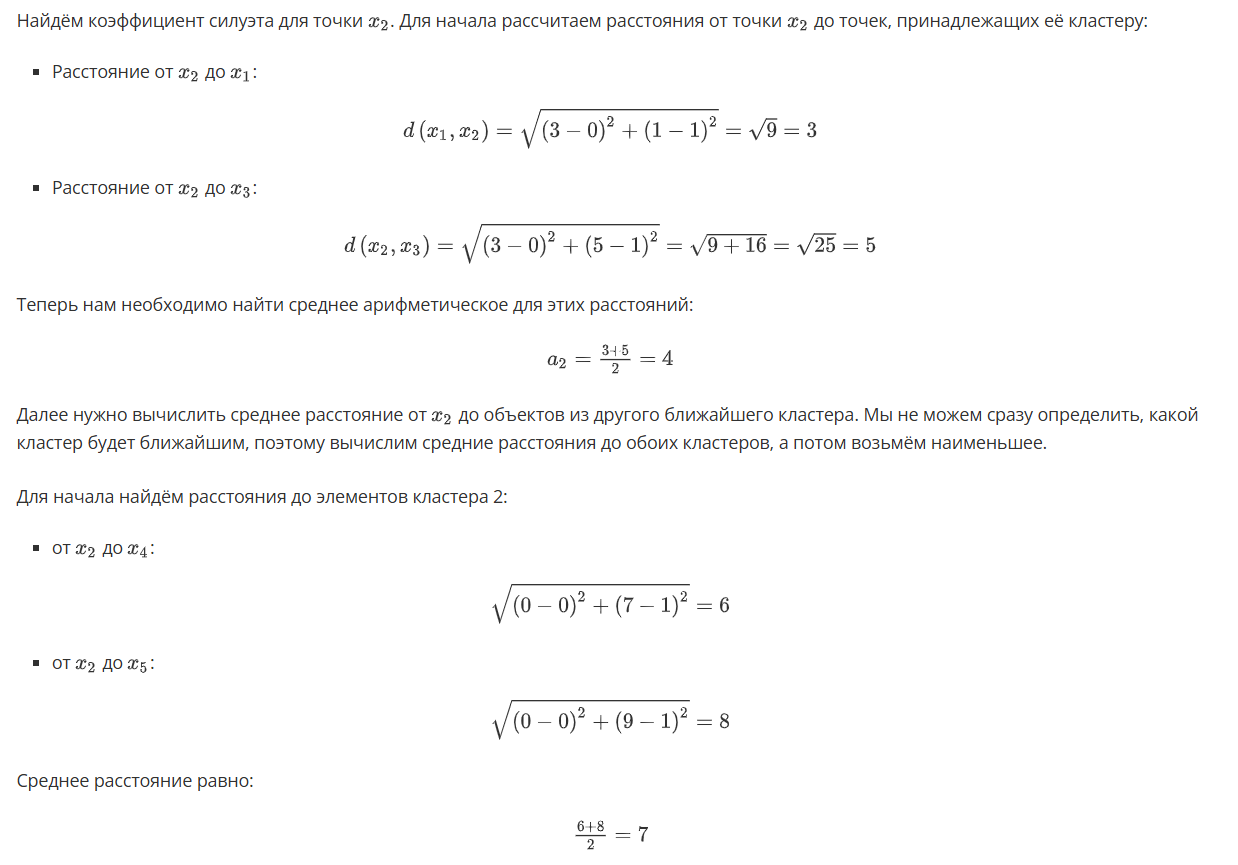

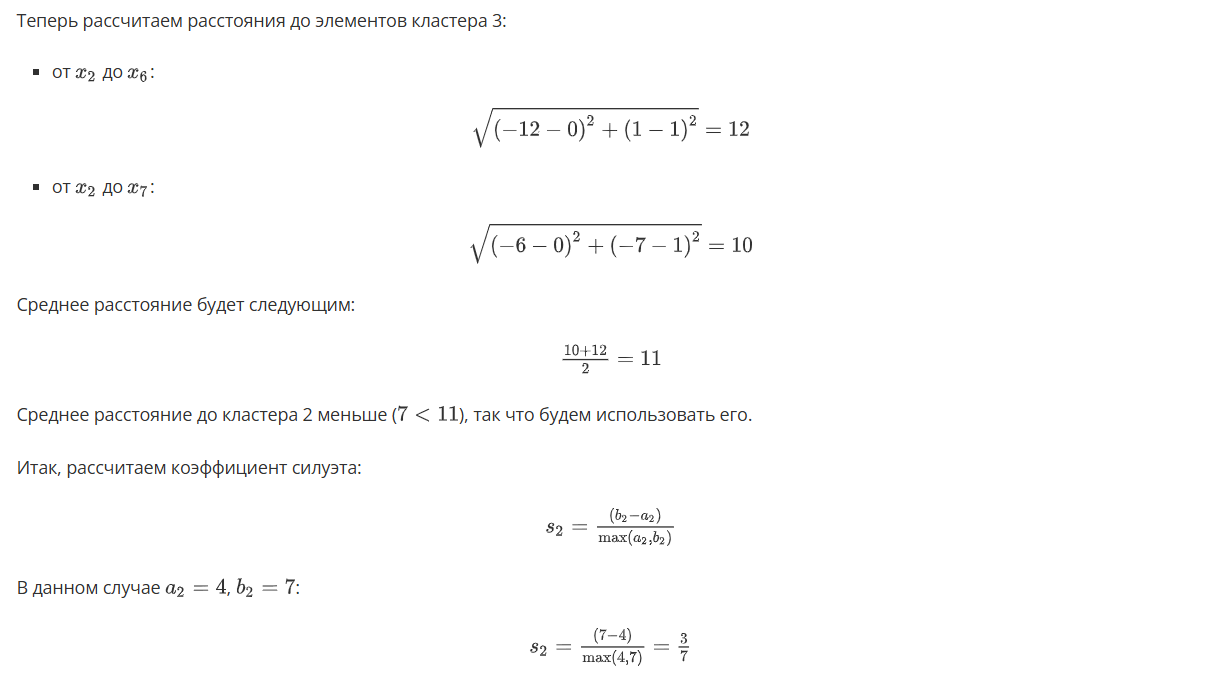

Отлично, мы нашли значение коэффициента силуэта для X2. Для того чтобы найти итоговое значение коэффициента силуэта для выборки, необходимо найти значения для остальных шести объектов, а затем усреднить семь значений, однако мы опустим эти вычисления — надеемся, что алгоритм действий вам уже и так понятен.

При решении практических задач вы будете использовать уже готовые алгоритмы на Python. Для вычисления коэффициента силуэта в библиотеке sklearn используется silhouette_score:

In [ ]:
import sklearn
from sklearn.cluster import KMeans

#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента силуэта
score = silhouette_score(X, km.labels_, metric='euclidean')

Значение коэффициента силуэта всегда находится в диапазоне [−1,1].

- Значение близко к −1: объекты в кластерах разрознены, и в целом кластерную структуру не удалось выделить.
- Значение близко к 0: кластеры пересекаются друг с другом.
- Значение близко к 1: чёткая кластерная структура с «плотными», отделёнными друг от друга кластерами.

Также мы можем изобразить распределение коэффициентов силуэта для объектов отдельных кластеров.

Например, визуализация для двух кластеров будет такой:

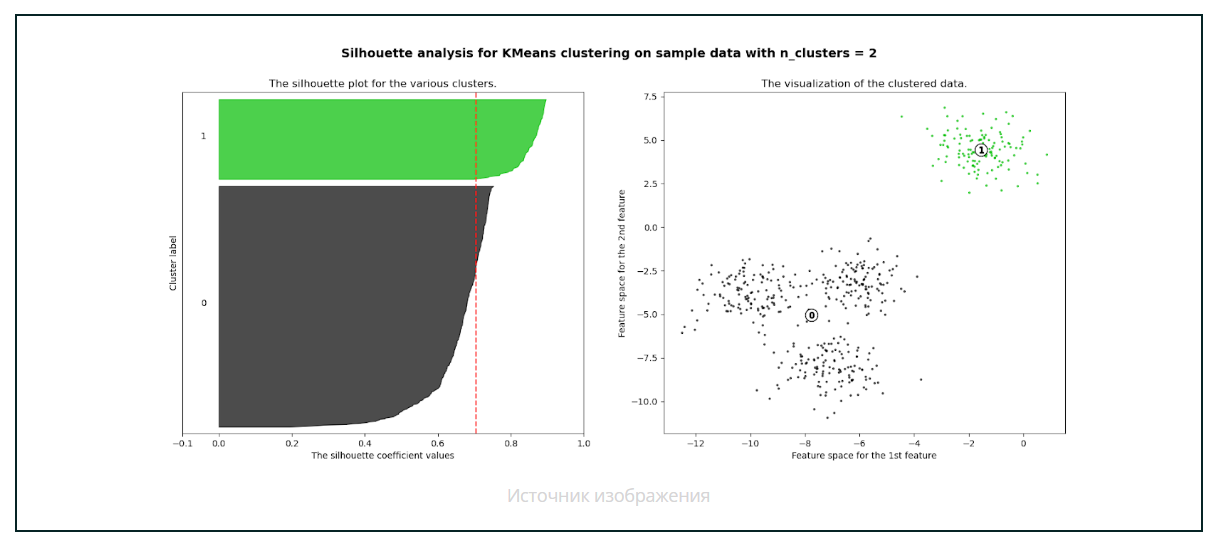

Пояснение. На графике слева красной пунктирной линией здесь и далее отмечено среднее значение коэффициента силуэта для данного случая кластеризации. Разными цветами (серый и зелёный) визуализированы распределения значений коэффициентов силуэта для объектов соответствующих кластеров. На графике справа отмечены объекты, окрашенные в разные цвета в соответствии с их принадлежностью к кластерам.

Здесь мы видим, что «нулевой» кластер (серого цвета) включает в себя точки с более маленькими значениями. Это довольно хорошо соотносится с правой визуализацией, т. к. в сером кластере точки местами разрознены сильнее, чем в зелёном.

Для случая трёх кластеров ситуация будет следующей:

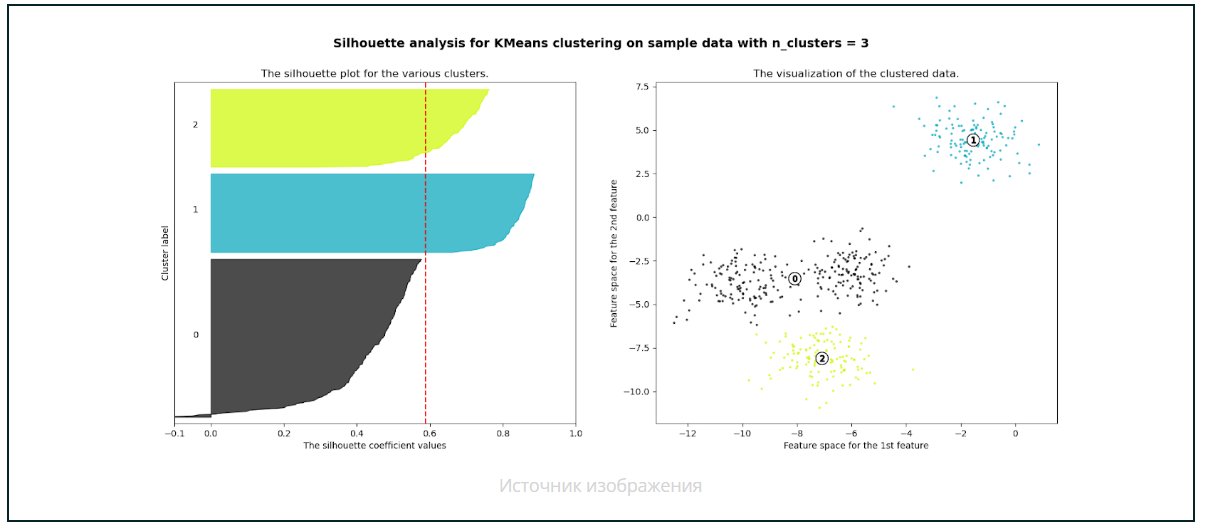

Довольно естественно (если посмотреть на график справа), что голубой кластер показывает наилучшую согласованность. У точек серого кластера коэффициенты всё так же самые низкие — явно напрашивается его разделение на ещё два кластера, и это действительно улучшает качество, так как значения коэффициентов силуэта увеличились (в новых сером и жёлтом кластерах они выше, чем были в предыдущем сером):

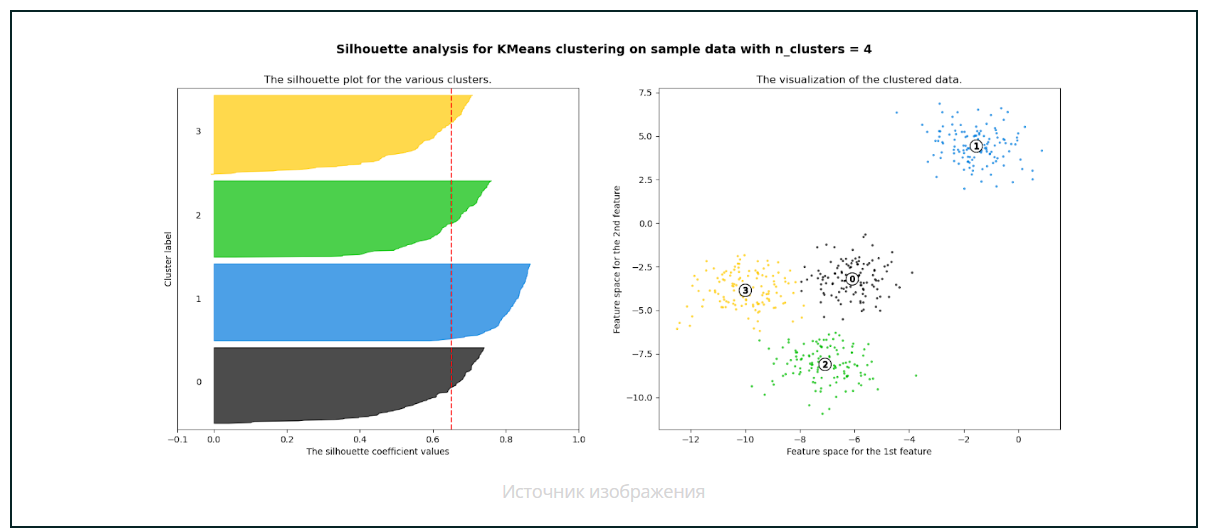

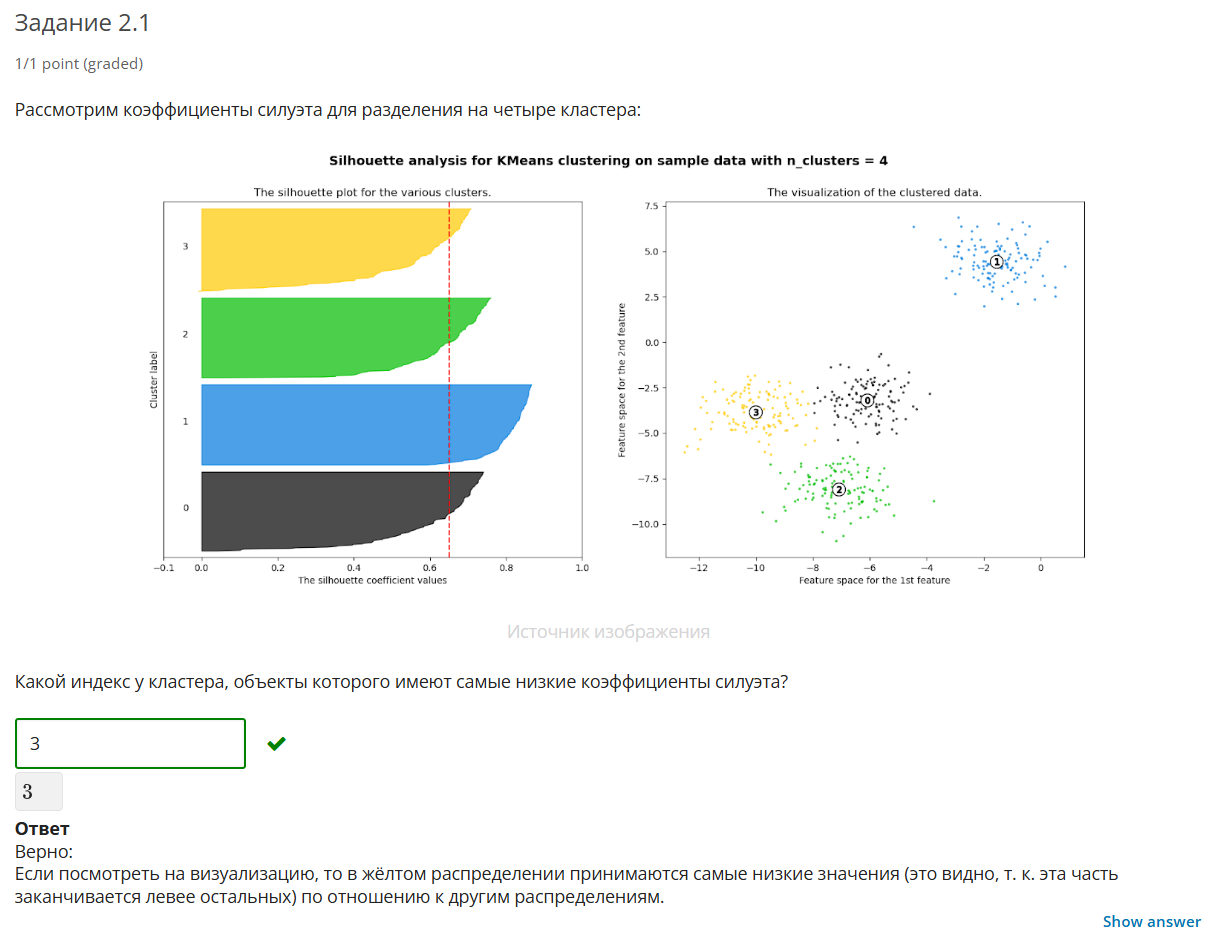

### 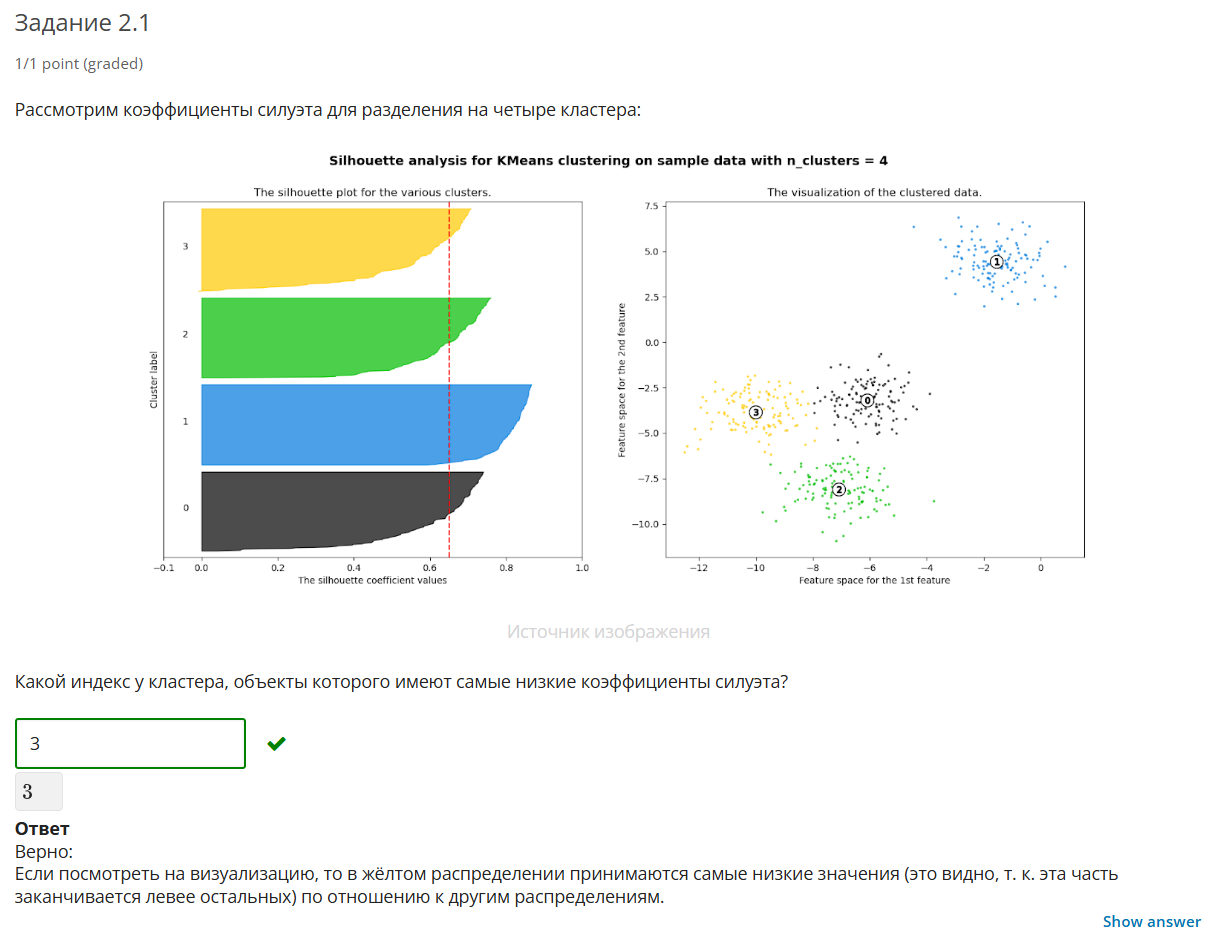

### Индекс Калински — Харабаса

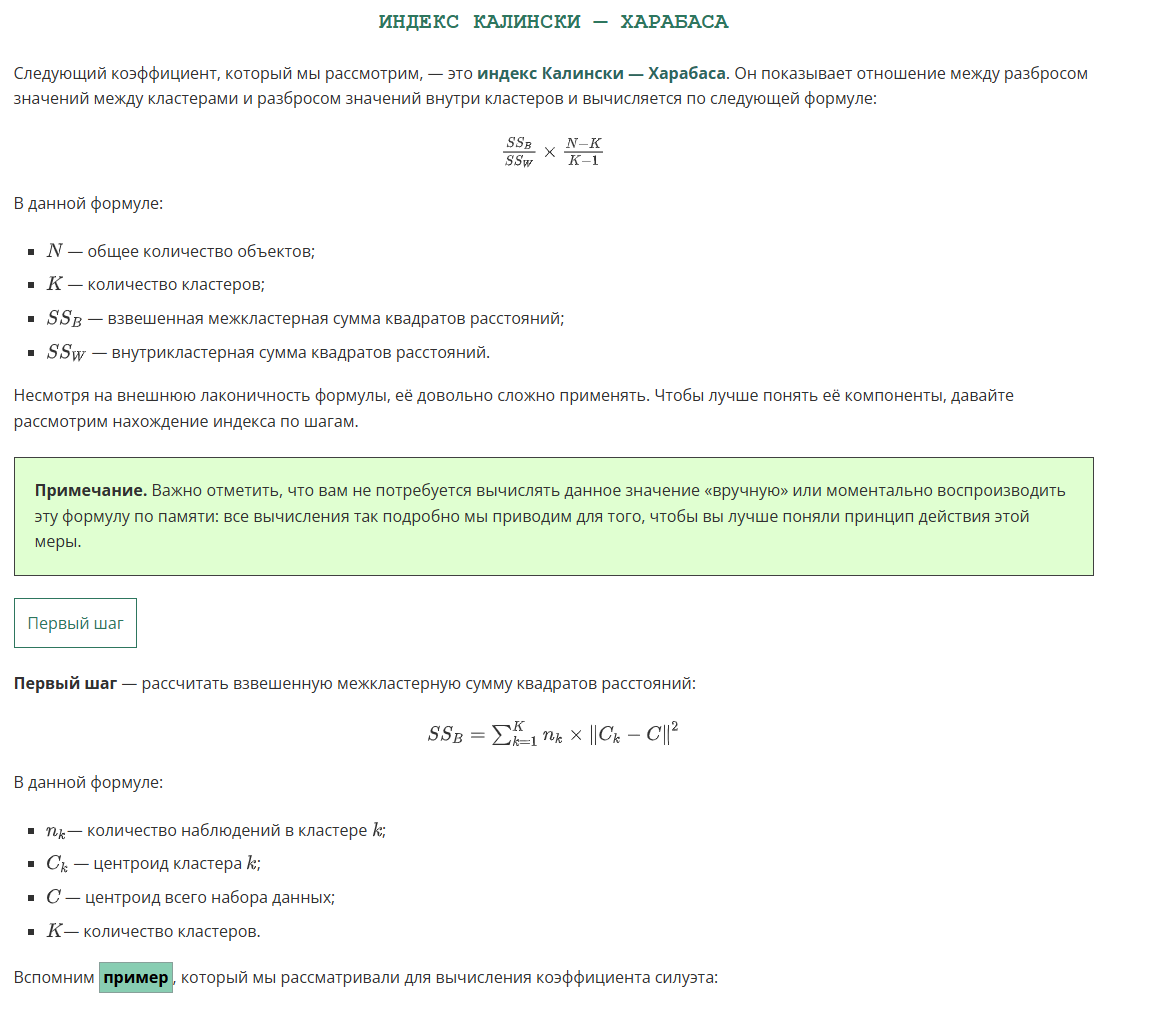

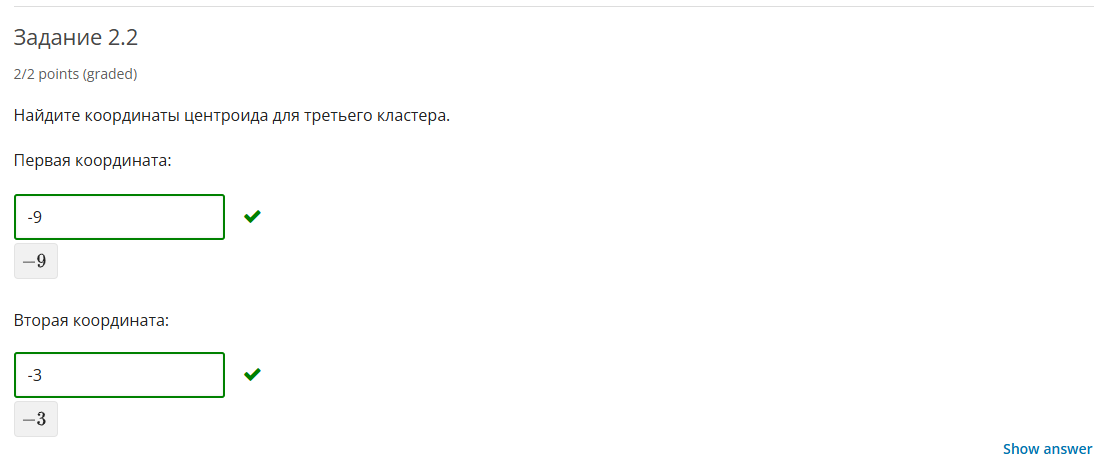

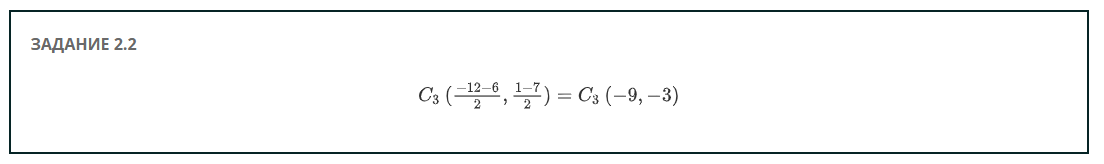

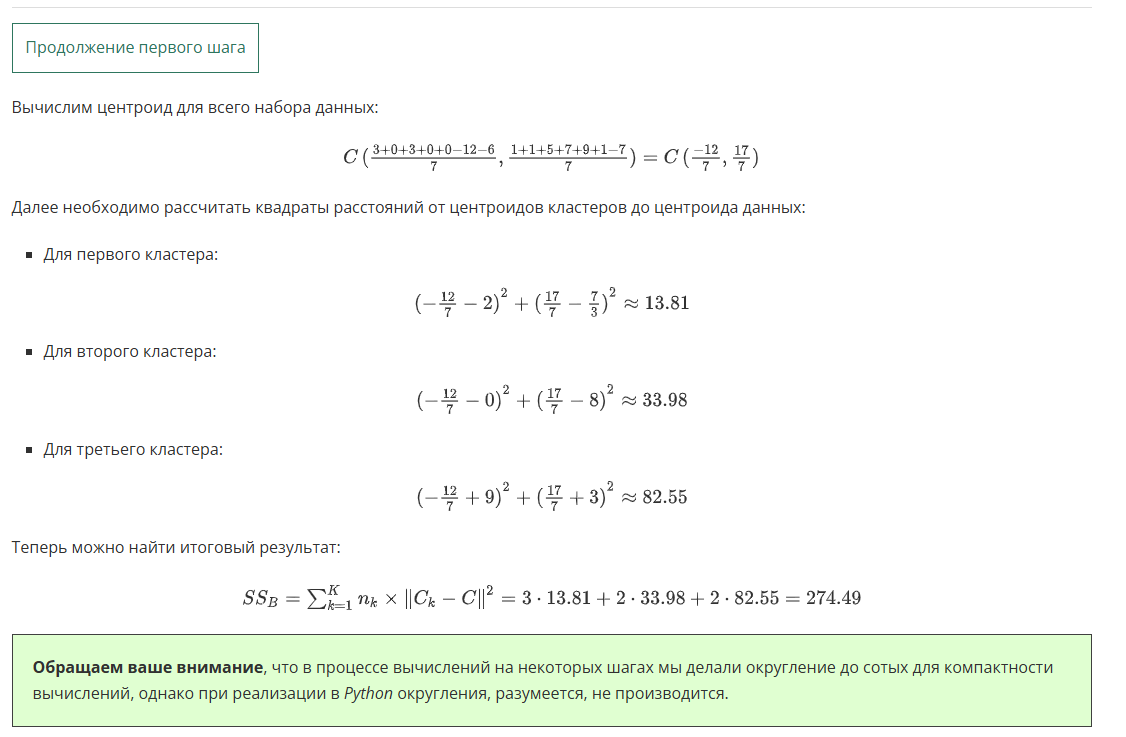

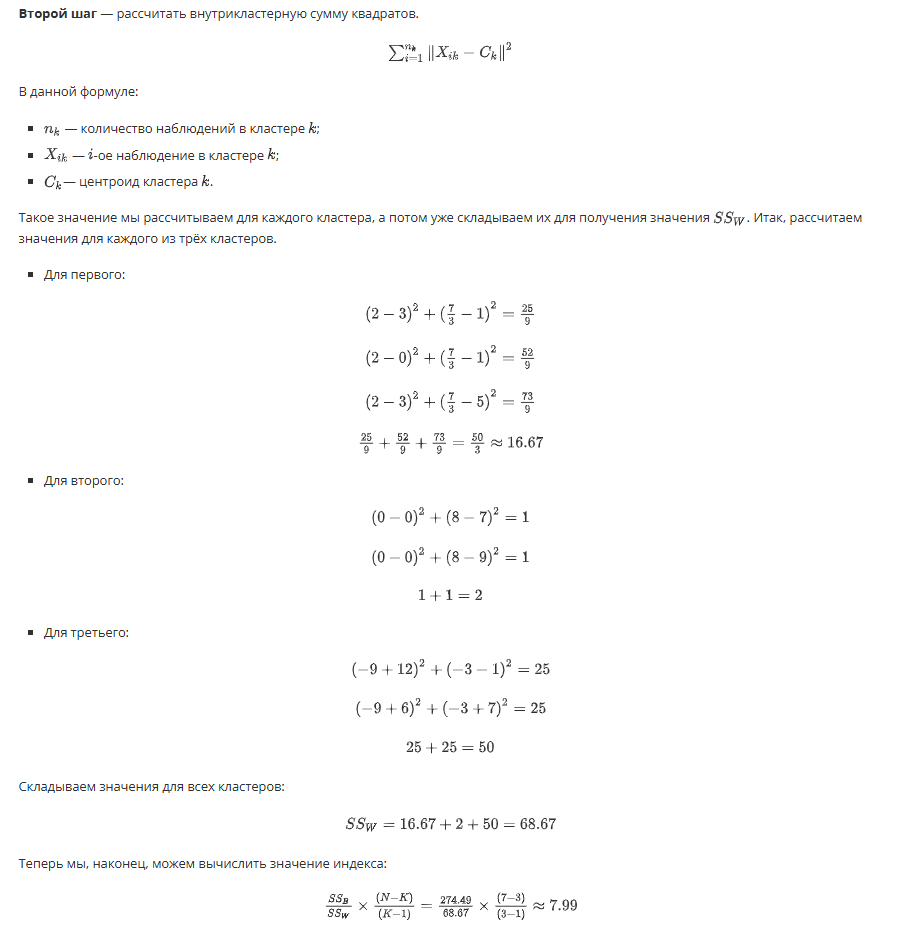

Важно отметить, что нет никакого «приемлемого» порогового значения индекса — скорее, его можно использовать для того, чтобы сравнивать разные разбиения на кластеры между собой: более высокое значение индекса будет означать, что кластеры плотные (т. е. объекты внутри них находятся близко друг к другу) и хорошо разделены. Например, если бы мы отразили зависимость показателя индекса от количества кластеров, то по графику ниже могли бы сделать вывод, что оптимальное количество кластеров будет равно трём, так как именно для этого числа кластеров значение индекса наибольшее:

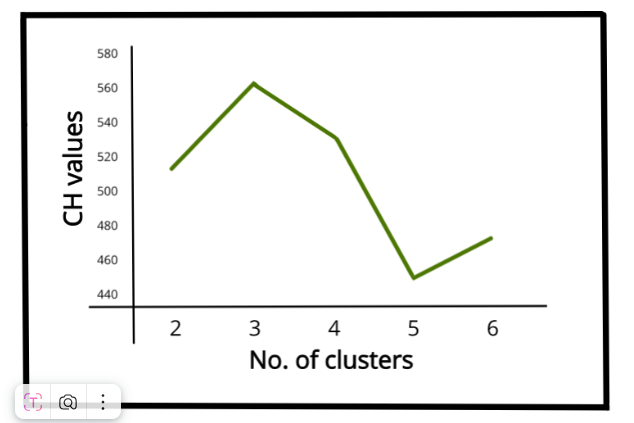

Пояснение: по оси абсцисс здесь отложено количество кластеров, а по оси ординат — значение индекса Калински — Харабаса.

В библиотеке sklearn данный алгоритм реализуется с помощью метода calinski_harabasz_score():

In [ ]:
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Калински — Харабаса
score = calinski_harabasz_score(X, km.labels_)

### Индекс Дэвиса — Болдина

Перейдём к последнему из трёх наиболее важных для нас коэффициентов — индексу Дэвиса — Болдина. Рассмотрим процесс его вычисления сразу по шагам, так как он реализуется достаточно сложно.

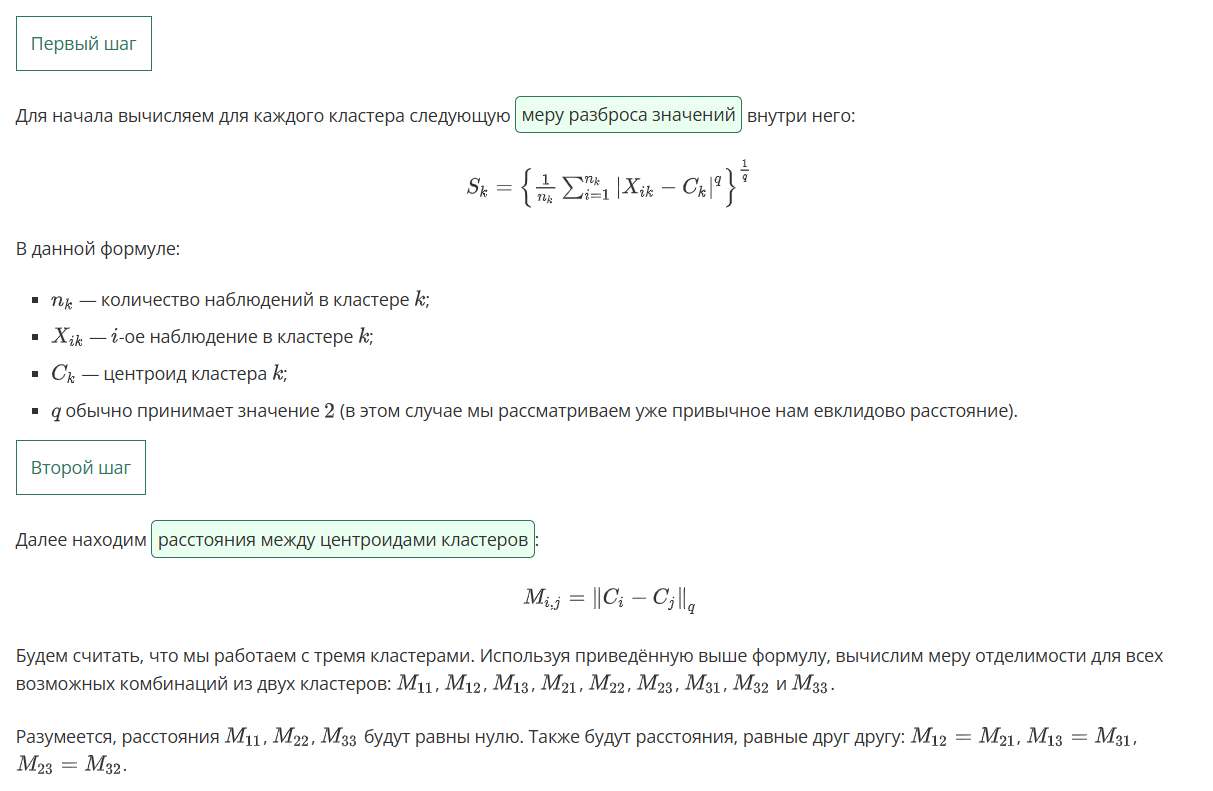

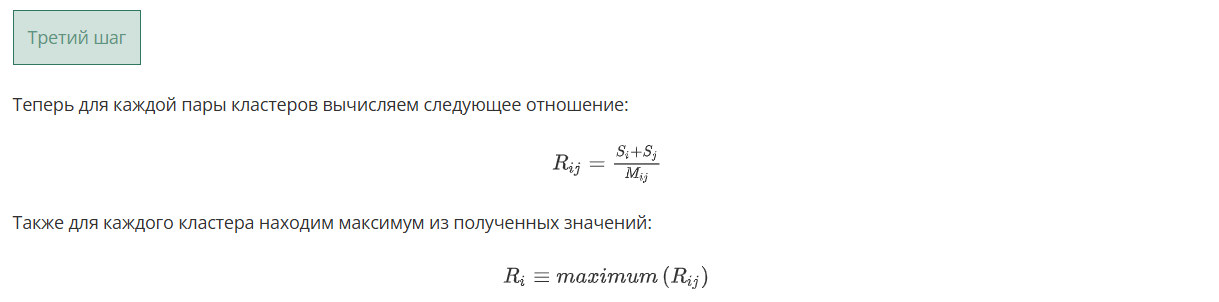

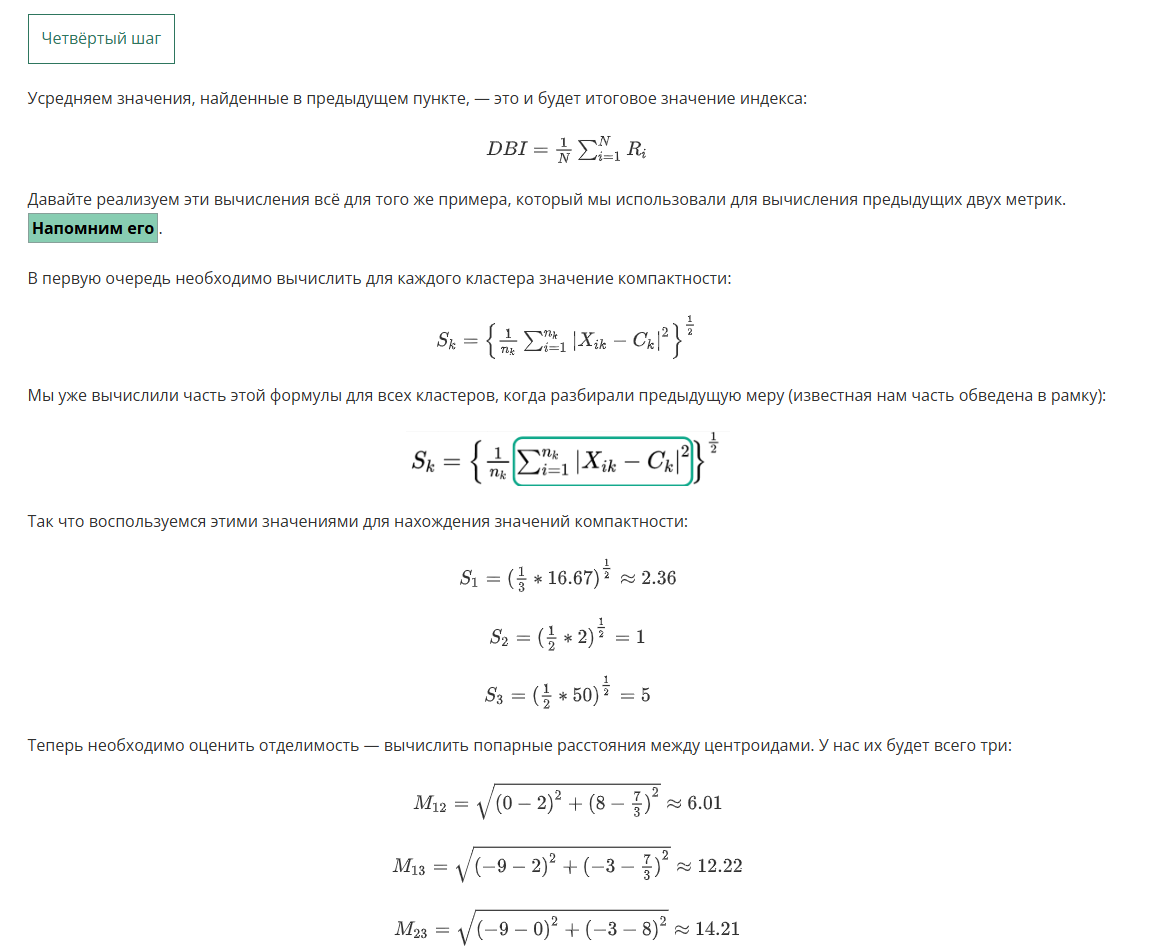

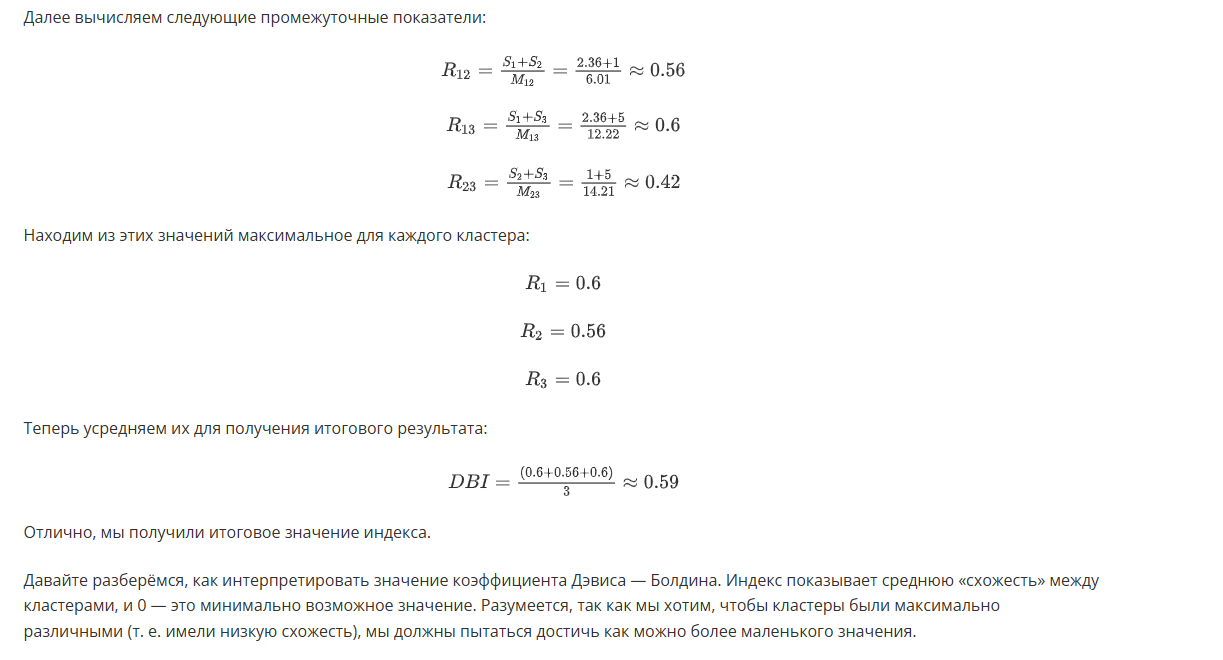

Давайте разберёмся, как интерпретировать значение коэффициента Дэвиса — Болдина. Индекс показывает среднюю «схожесть» между кластерами, и 0 — это минимально возможное значение. Разумеется, так как мы хотим, чтобы кластеры были максимально различными (т. е. имели низкую схожесть), мы должны пытаться достичь как можно более маленького значения.

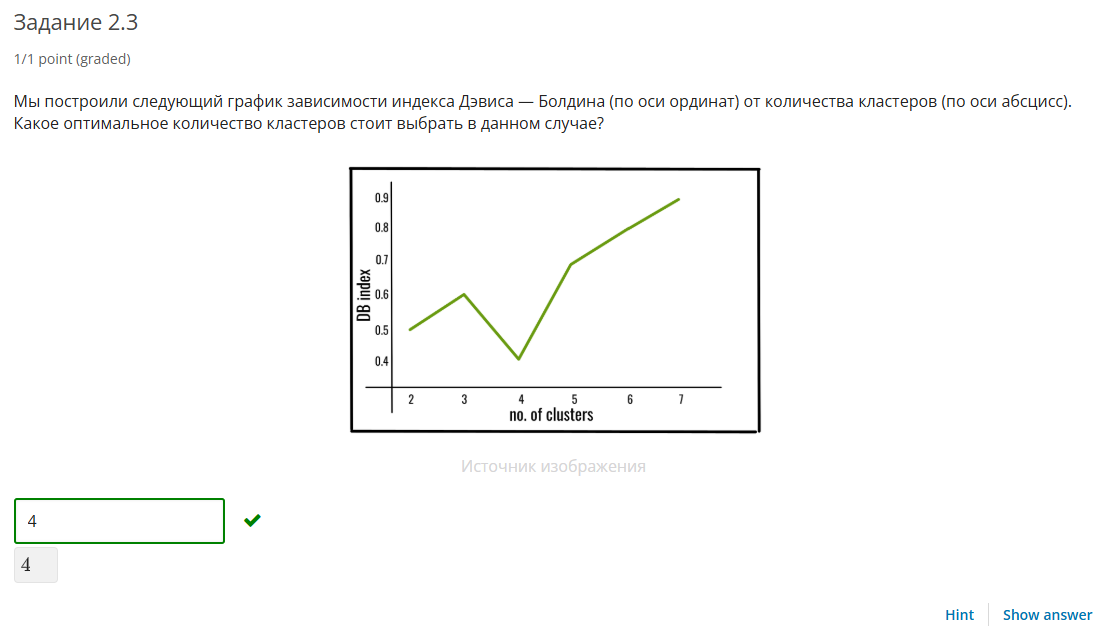

В библиотеке sklearn индекс Дэвиса — Болдина реализуется с помощью метода davies_bouldin_score():

In [ ]:
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Дэвиса — Болдина
score = davies_bouldin_score(X, km.labels_)

Итак, мы рассмотрели три наиболее популярных метрики, которые обычно вычисляются при кластеризации и заложены в библиотеке sklearn. Однако есть ещё ряд показателей, с которыми вы можете столкнуться в различных источниках. Несмотря на то что они не реализованы в готовых библиотеках Python, о них часто упоминают, когда речь идёт об оценке качества кластеризации. Мы не будем подробно рассматривать вычисления для них, однако ознакомимся с их сутью, чтобы вы могли составить полную картину.

### Внутрикластерное расстояние

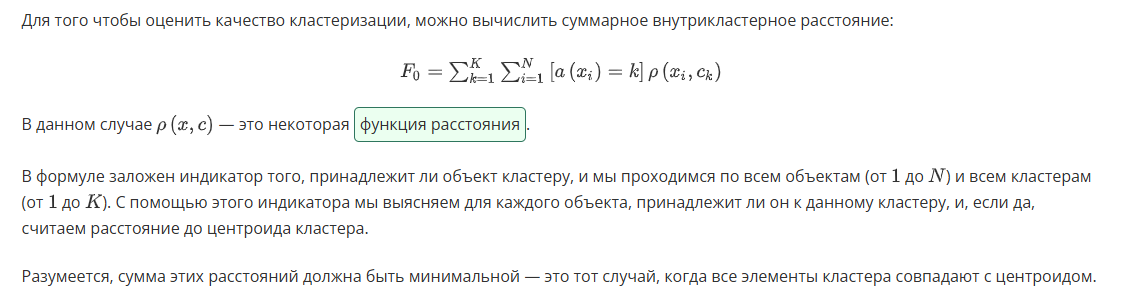

### Межкластерное расстояние

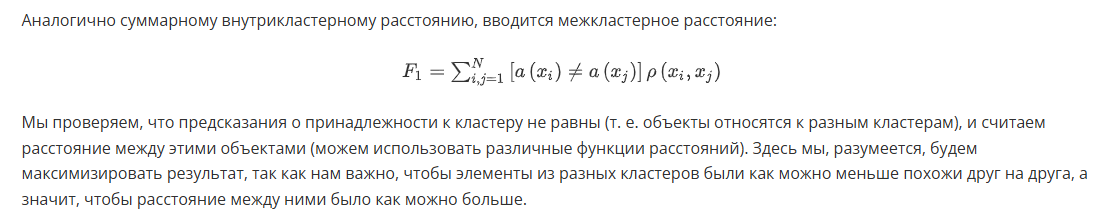

### Отношение расстояний

Логичным образом из предыдущих двух метрик (внутрикластерного и межкластерного расстояний) мы получаем отношение расстояний:

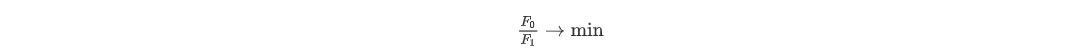

Таким образом мы можем учитывать оба функционала, рассмотренные ранее (расстояние внутри кластера и между кластерами), и оптимизировать отношение расстояний. Естественно, нам нужно, чтобы оно было минимальным — это будет достигаться, если расстояние между кластерами максимально, а внутри кластера — минимально.

Итак, мы рассмотрели все основные внутренние меры для оценки качества кластеризации. Давайте сведём всё изученное в небольшую таблицу:

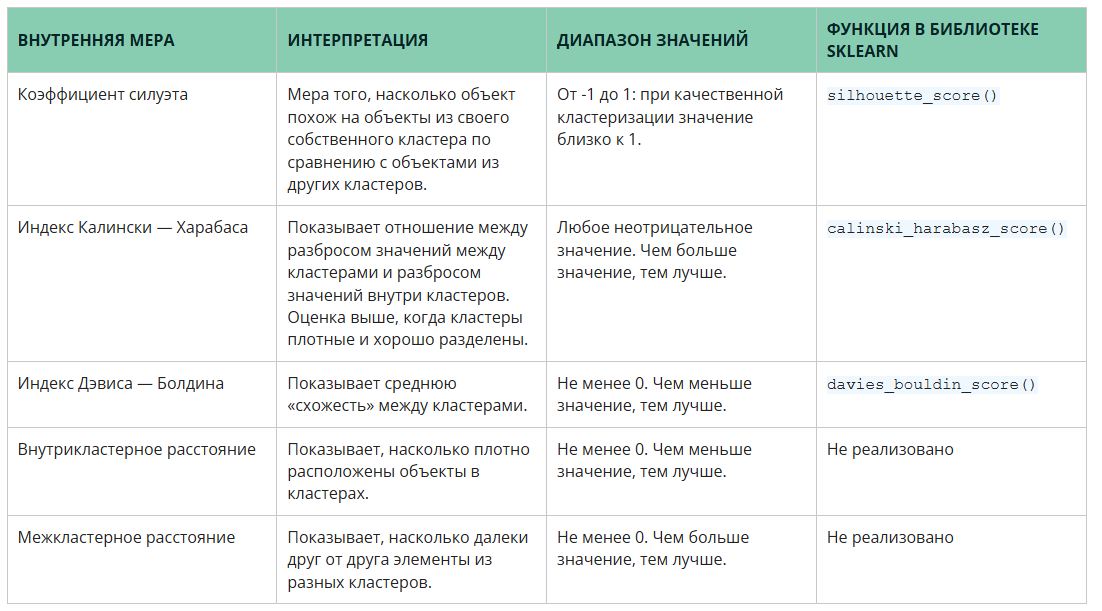

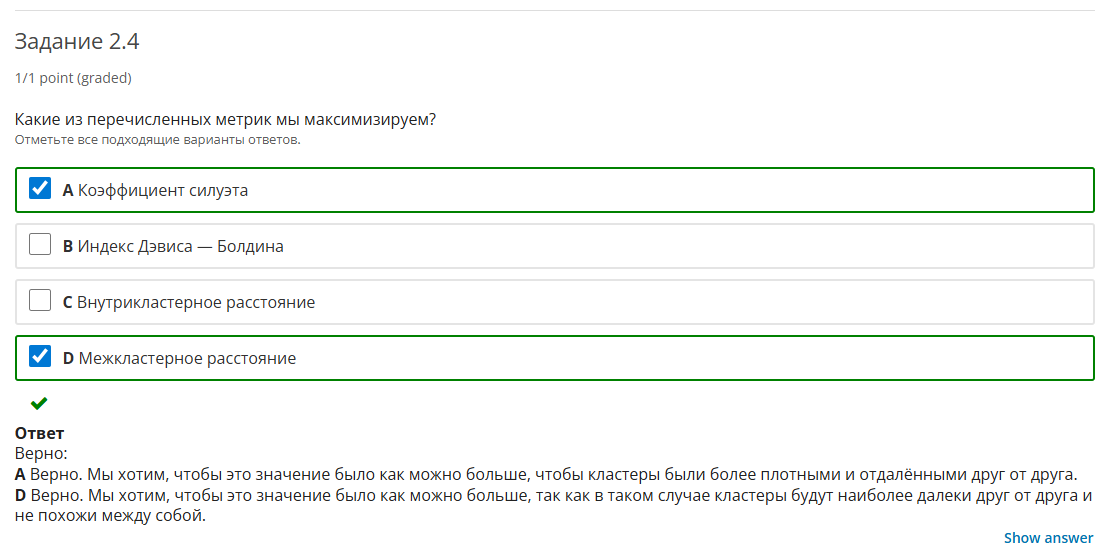

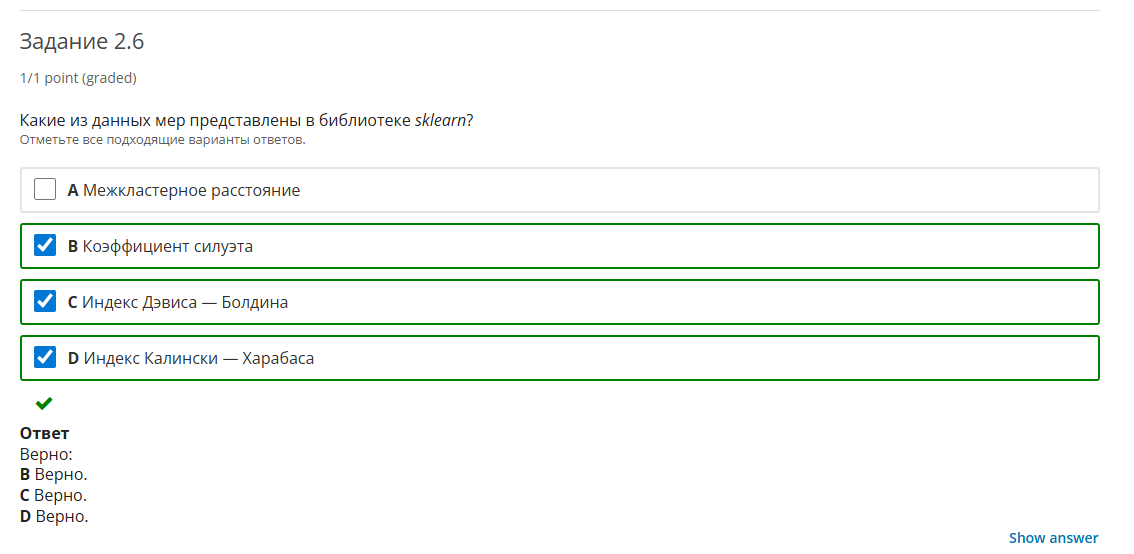

В следующем юните мы изучим внешние меры, которые используются в случае, когда известно эталонное разбиение на кластеры. После этого мы сравним различные алгоритмы кластеризации на примере практической задачи с использованием изученных мер →

# 3. Оценка качества кластеризации: внешние меры

✍ В предыдущем юните мы рассмотрели меры, которые можно использовать для оценки качества кластеризации, если данные являются полностью неразмеченными. Однако иногда бывает такое, что какая-то разметка в наших данных всё же есть. В этом случае мы можем использовать дополнительные показатели, которые помогут оценить качество кластеризации.

В данном юните мы рассмотрим **внешние меры**. Часть из них вы уже изучали, однако сейчас мы опишем их более строго с формальной точки зрения и будем концентрироваться не только на их смысле, но и на математической составляющей. Также мы познакомимся с некоторыми мерами, которые не рассматривали ранее.

### Индекс Рэнда

Первая внешняя мера, которую мы рассмотрим, — это **индекс Рэнда**. В целом, это не совсем метрика для оценки качества кластеризации: индекс Рэнда — это мера сходства между двумя кластеризациями. Однако, так как он позволяет сравнить два разбиения на кластеры, мы можем использовать его для сравнения фактических меток классов и прогнозируемых меток кластеров, тем самым оценивая качество наших алгоритмов.

Данный индекс сравнивает фактическое разбиение и результат применения алгоритма кластеризации и оценивает, сколько пар, находившихся в одном или в разных кластерах, сохранили это состояние.

Индекс Рэнда вычисляется по следующей формуле:

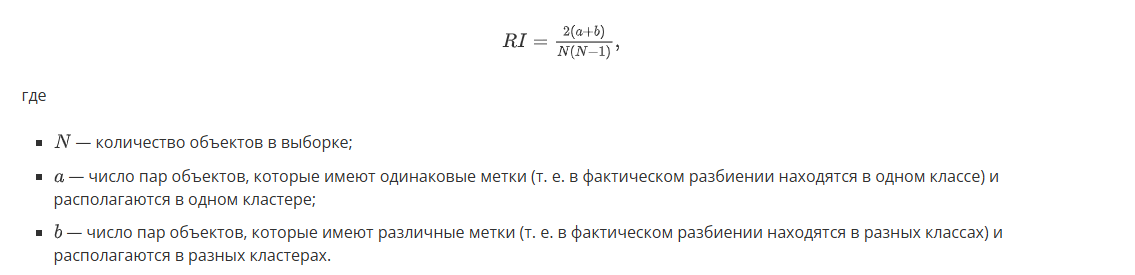

Обратите внимание, что знаменатель здесь выражает общее количество пар, которые можно получить из нашего набора данных. То есть, по сути, в этом индексе вычисляется доля пар, для которых сохранилось их расположение по отношению друг к другу.

Рассмотрим пример вычисления индекса Рэнда.

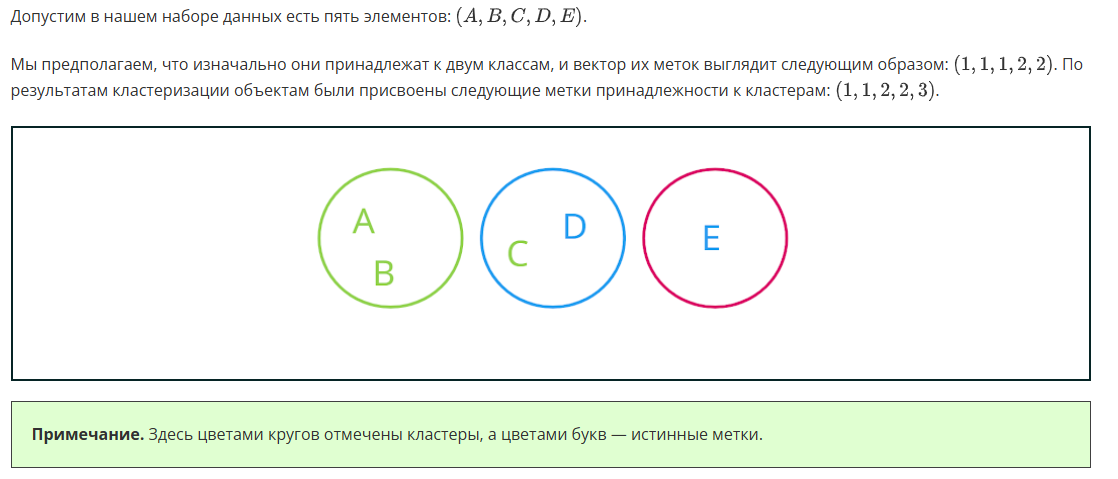

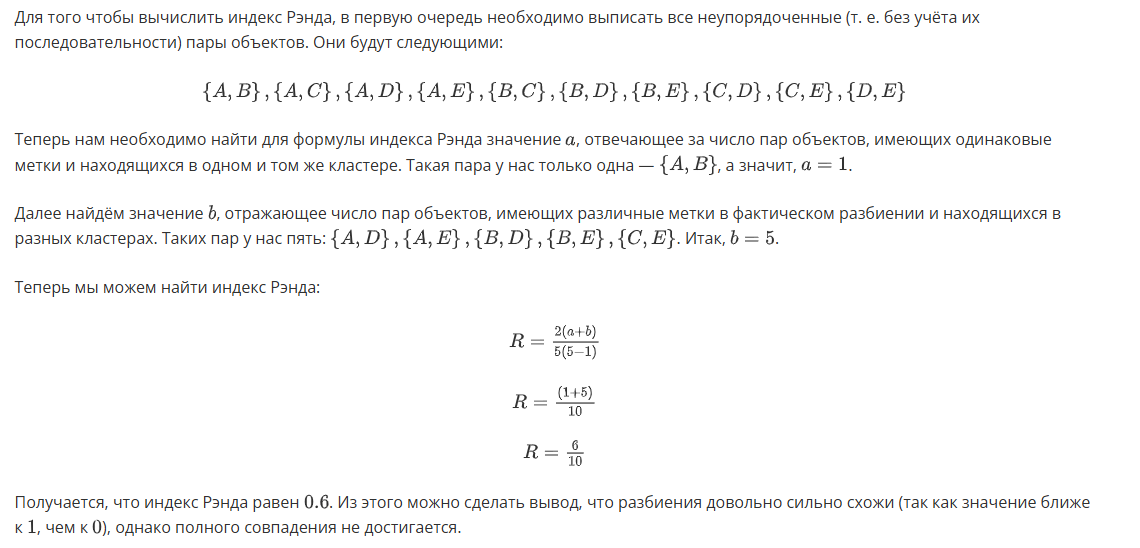

Для вычисления индекса Рэнда с помощью библиотеки sklearn можно использовать метод rand_score():

In [ ]:
print(rand_score([1, 1, 1, 2, 2], [1, 1, 2, 2, 3]))

Заметьте, мы получим такой же результат — 0.6.

Также используют скорректированный индекс Рэнда (Adjusted Rand Index):

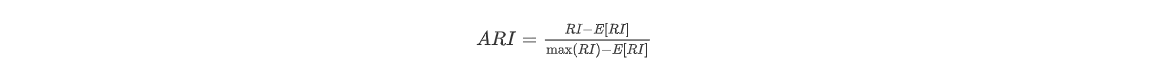

Его преимущество перед обычным индексом Рэнда состоит в том, что при случайных кластеризациях его значение близко к нулю вне зависимости от количества кластеров и наблюдений.

Исправленный индекс Рэнда в sklearn представлен через метод adjusted_rand_score().

Интерпретация скорректированного индекса Рэнда:

- Отрицательные значения индекса говорят о различных, независимых разбиениях.
- Значения, близкие к нулю, являются индикаторами случайного разбиения.
- Положительные значения показывают схожесть разбиений (значение, равное , получается при полном совпадении кластеризаций).

### Нормализованная взаимная информация

Следующая мера — **NMI (Normalized Mutual Information), или нормализованная взаимная информация**. Она определяется следующим образом:

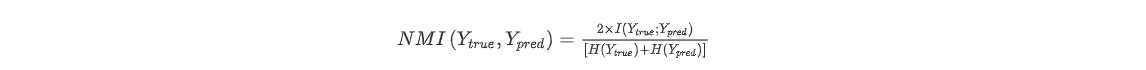

Здесь:

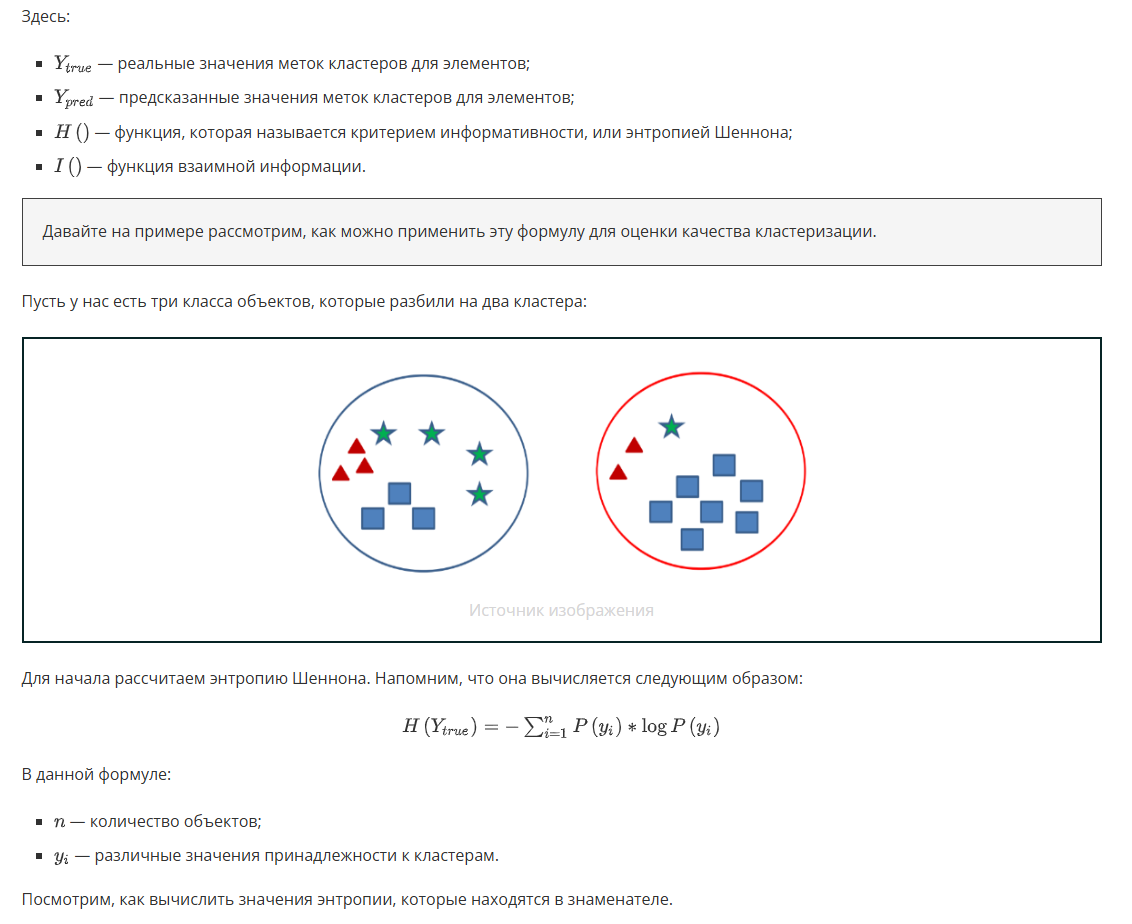

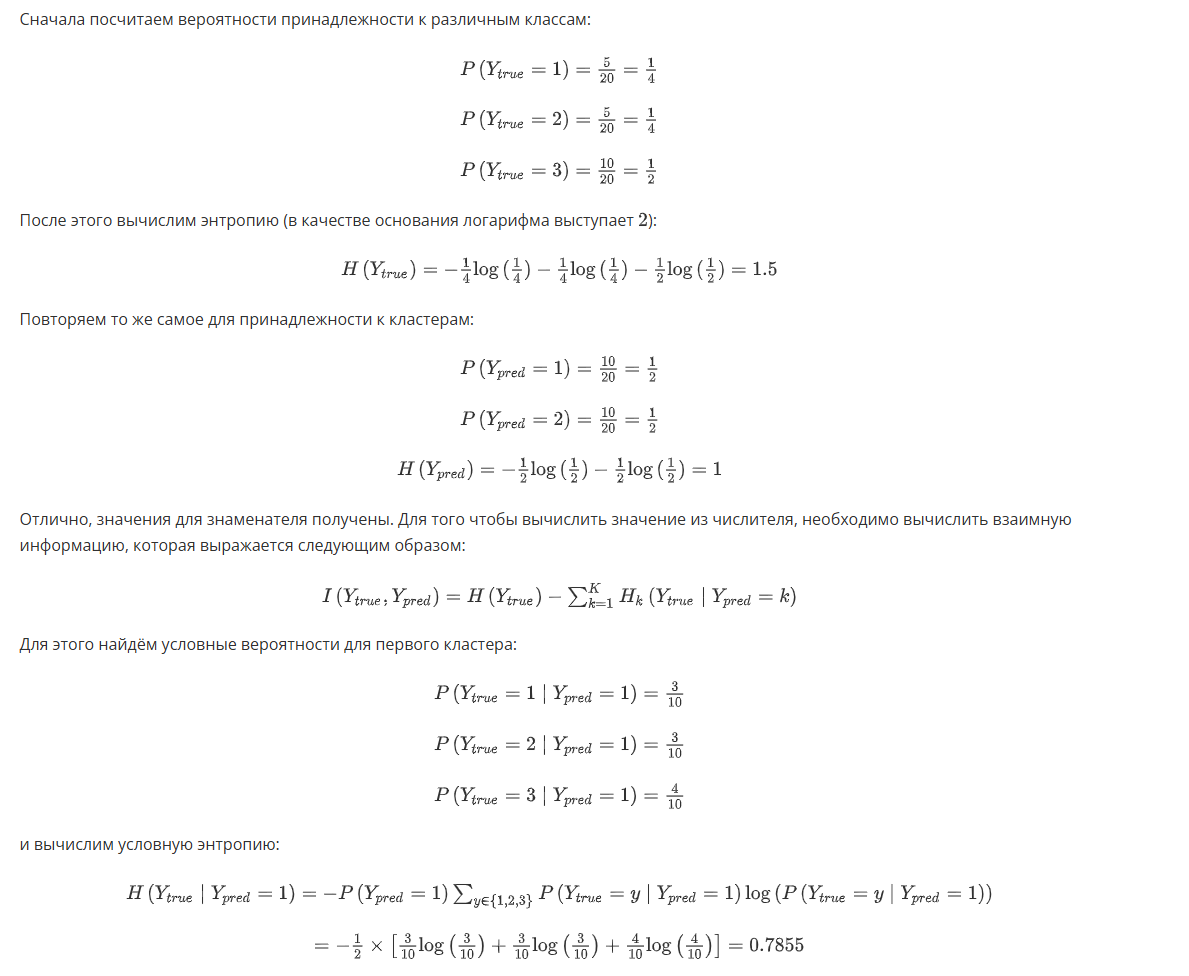

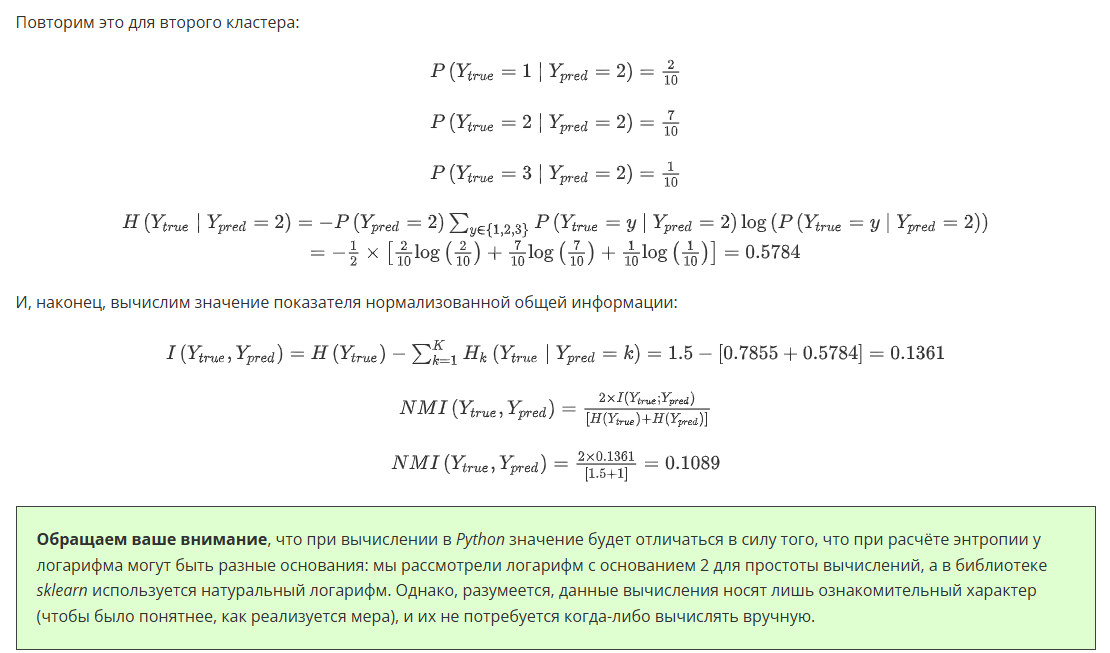

В sklearn для вычисления NMI существует метод normalized_mutual_info_score().

С точки зрения оценки качества разбиения коэффициент должен быть как можно ближе к единице: нулевое значение указывает на случайное разбиение, а 1 — на максимальную согласованность. В нашем случае значение получилось ближе к 0, но, учитывая предложенное разбиение (далёкое от необходимого), это ожидаемый результат.

### Однородность

Следующая метрика, которую мы рассмотрим, вам уже известна — это однородность (ещё её называют гомогенностью). Она показывает, насколько элементы в кластере похожи между собой, и вычисляется по следующей формуле:

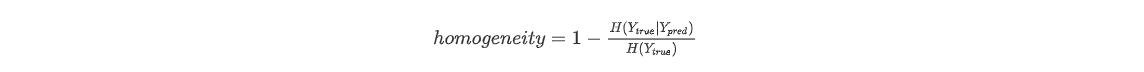

Мы не будем приводить здесь полные вычисления этой метрики из-за их сложности. В данной формуле, как и в предыдущей, используется энтропия, так что при желании вы можете попрактиковаться в её использовании, однако на практике это не понадобится.

Однородность также можно вычислить, воспользовавшись методом homogeneity_score() из библиотеки sklearn.

Важно, чтобы показатель гомогенности был как можно ближе к единице: это говорит о том, что в кластере находятся элементы одного и того же класса. Если он близок к нулю, это означает, что в кластере находятся элементы из разных классов.

### Полнота

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, оказались в одном кластере.

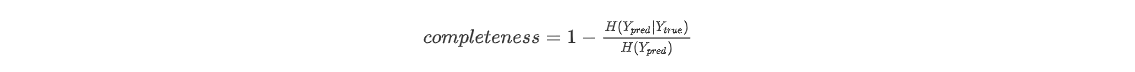

По аналогии с однородностью, важно, чтобы значение метрики было близко к единице.

Для вычисления полноты с помощью библиотеки sklearn используется метод completeness_score().

Рассмотрим два примера.

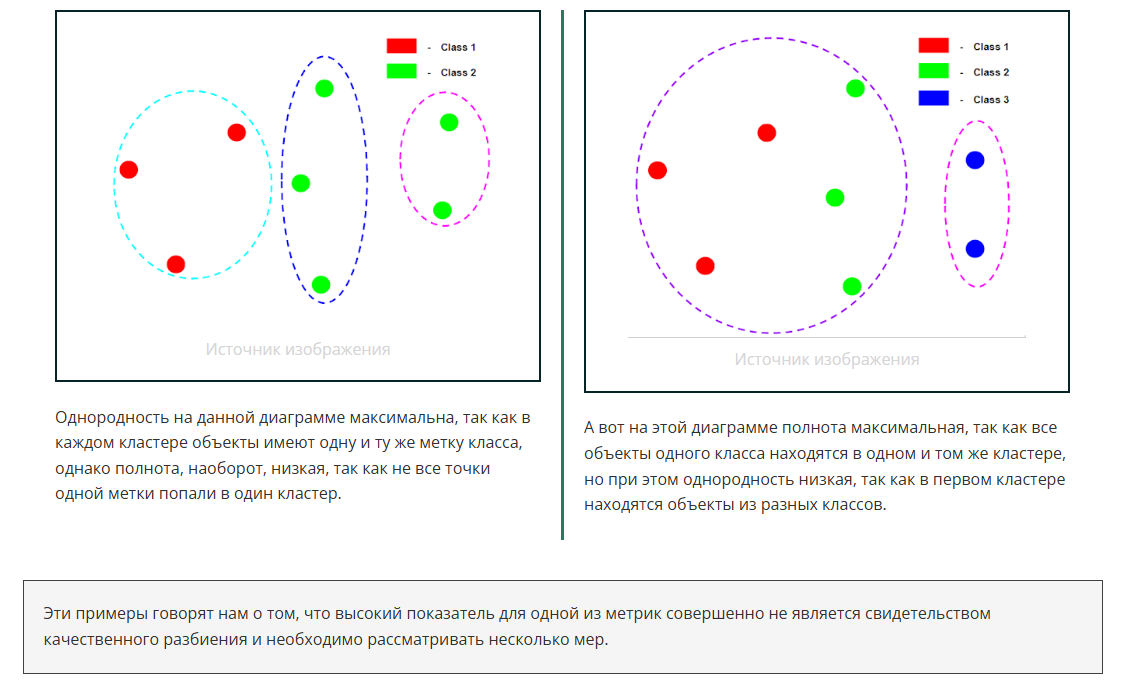

### V-мера

Мы уже выяснили, что лучше рассматривать несколько мер сразу, так как каждая мера в отдельности может показывать высокое качество даже для плохого разбиения. В ответ на такую необходимость появляется метрика, которая является комбинацией метрик полноты и однородности и вычисляется как их гармоническое среднее, — это V-мера:

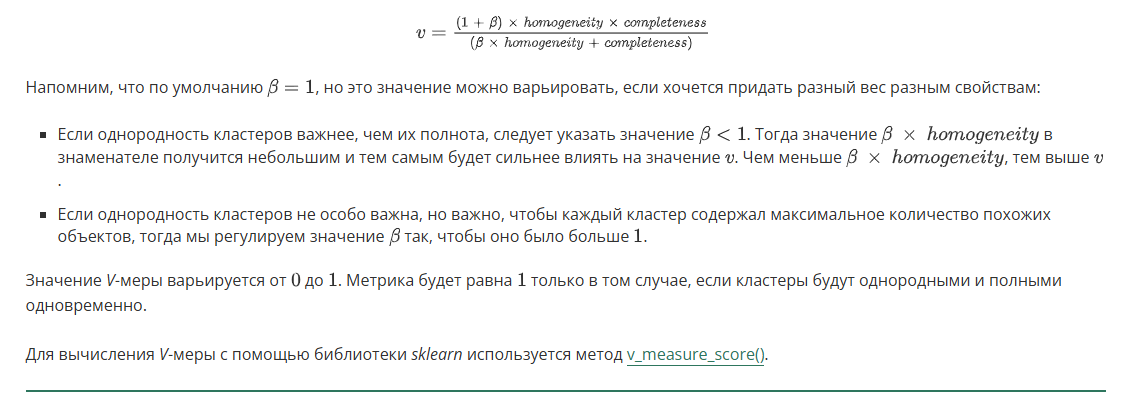

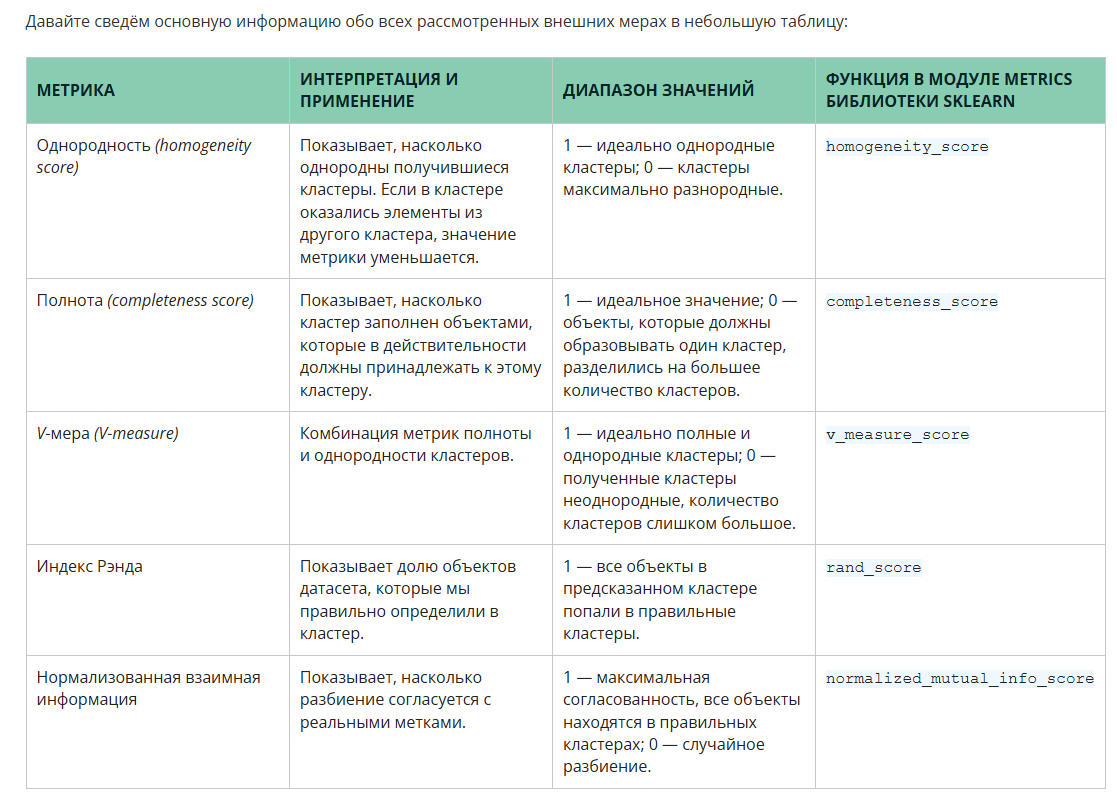

⭐ Итак, мы рассмотрели все основные меры, которые можно использовать для оценки качества кластеризации.

Стоит отметить, что у всех перечисленных метрик есть большой недостаток: для их использования необходимо знать истинные принадлежности к кластерам. На практике это практически всегда недоступно (а если разметка всё же есть, то проще перейти к задаче классификации) или требует финансовых и трудовых затрат, к примеру, если мы делаем разметку вручную.

Однако иногда вычисление подобных мер может принести пользу, и уже в следующем юните вы попробуете применить их для решения задачи →